**FACIAL EXPRESSION RECOGNITION PROJECT**

**Building a CNN for the dataset**

Upload the dataset

In [2]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [3]:
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset
!ls

 95% 114M/121M [00:02<00:00, 48.5MB/s]
100% 121M/121M [00:02<00:00, 54.1MB/s]
face-expression-recognition-dataset.zip  sample_data


In [ ]:
!unzip -o face-expression-recognition-dataset.zip
!ls

**Exploratory Data**

Check the deatils of the images.

In [5]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [6]:
import os
import zipfile

zipfile.ZipFile('face-expression-recognition-dataset.zip').extractall()
os.listdir('./images/images/')

['train', 'validation']

In [7]:
#Checking the details of the train and test data.

train_dir = './images/images/train/'
train_categories = set(os.listdir(train_dir))
validation_dir = './images/images/validation/'
test_categories = set(os.listdir(validation_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
7


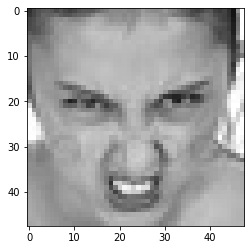

In [8]:
#Checking if the images match the expressions
import cv2 as cv
import matplotlib.pyplot as plt

sample_dir = os.path.join(train_dir, 'angry')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

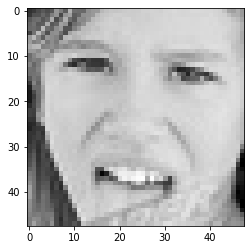

In [9]:
sample_dir = os.path.join(train_dir, 'disgust')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

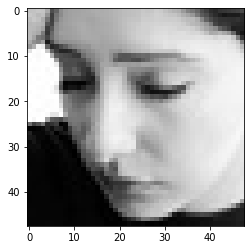

In [10]:
sample_dir = os.path.join(train_dir, 'fear')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

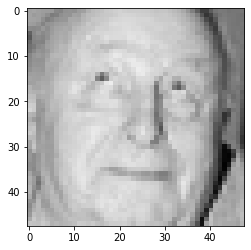

In [11]:
sample_dir = os.path.join(train_dir, 'happy')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

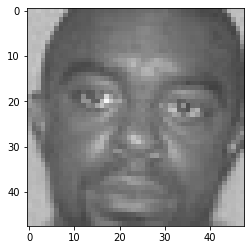

In [12]:
sample_dir = os.path.join(train_dir, 'neutral')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

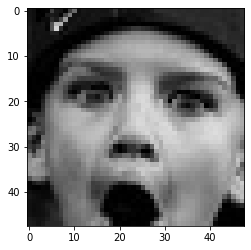

In [13]:
sample_dir = os.path.join(train_dir, 'surprise')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

In [14]:
img.min(), img.max()

(0, 221)

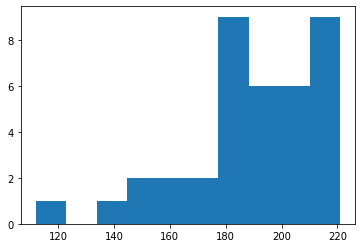

In [42]:
import matplotlib.pyplot as plt

_ = plt.hist(train_dir.loc[:, FEATURES].max().unique())

In [38]:
train_dir.isna().any().any()

False

In [15]:
import tensorflow as tf

train_dir = './images/images/train/'

train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=128,
    image_data_generator=None)

Found 28821 images belonging to 7 classes.


In [2]:
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 0)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 1)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 2)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 3)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 4)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 5)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 6)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 7)[0][0]])

NameError: ignored